# Vamos analisar vinhos brancos!

Usaremos um dataset composto por propriedades físico-químicas de vinhos brancos. Temos 6497 amostras e um total de 11 variáveis independentes mais o tipo de vinho (type), descritas abaixo:

 - `fixed acidity`: a maioria dos ácidos envolvidos com vinho (não evaporam prontamente)
 - `volatile acidity`: a quantidade de ácido acético no vinho, que em níveis muito altos pode levar a um gosto desagradável de vinagre
 - `citric acid`: encontrado em pequenas quantidades, o ácido cítrico pode adicionar "leveza" e sabor aos vinhos
 - `residual sugar`: a quantidade de açúcar restante após a fermentação é interrompida, é raro encontrar vinhos com menos de 1 grama / litro e vinhos com mais de 45 gramas / litro são considerados doces
 - `chlorides`: a quantidade de sal no vinho
free sulfur dioxide: a forma livre de SO2 existe em equilíbrio entre o SO2 molecular (como gás dissolvido) e o íon bissulfito; impede o crescimento microbiano e a oxidação do vinho
 - `total sulfur dioxide`: Quantidade de formas livres e encadernadas de S02; em baixas concentrações, o SO2 é quase indetectável no vinho, mas nas concentrações de SO2 acima de 50 ppm, o SO2 se torna evidente no nariz e no sabor do vinho.
 - `density`: a densidade do vinho é próxima a da água, dependendo do percentual de álcool e teor de açúcar
 - `pH`: descreve se o vinho é ácido ou básico numa escala de 0 (muito ácido) a 14 (muito básico); a maioria dos vinhos está entre 3-4 na escala de pH
 - `sulphates`: um aditivo de vinho que pode contribuir para os níveis de gás de dióxido de enxofre (S02), que age como um antimicrobiano e antioxidante
 - `alcohol`: o percentual de álcool no vinho


Existe ainda uma variável chamada `quality`. Essa variável é uma nota de qualidade do vinho que varia de 0 a 10.

# Trabalho:

Kaggle

Link do certificado: https://drive.google.com/file/d/1QYMGnxyC0iaKSURAq55OwIg59pef9hv4/view?usp=share_link

![](https://drive.google.com/file/d/1QYMGnxyC0iaKSURAq55OwIg59pef9hv4/view?usp=share_link)

Faça o download da base - esta é uma base real, apresentada no artigo:
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

In [52]:
# Base baixada, criando dataframe e importando tudo:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    RocCurveDisplay
)

sns.set_style("ticks")
sns.set_context("paper")

wine = pd.read_csv('winequalityN.csv', sep=",")

wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Ela possui uma variável denominada "quality", uma nota de 0 a 10 que denota a qualidade do vinho. Crie uma nova variável, chamada "opinion" que será uma variável categórica igual à 0, quando quality for menor ou igual à 5. O valor será 1, caso contrário. Desconsidere a variável quality para o restante da análise.

In [53]:
# criando coluna opinion 

wine['opinion'] = (wine['quality'] > 5).astype(int)
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,opinion
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6,1
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [54]:
# analisando dados: numeros de red e de white

wine['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [55]:
# separando em novo dataframe apenas vinhso brancos e dropando a coluna quality

color = 'white'
df_white = wine.drop('quality', axis=1).query('type == @color').copy()

In [56]:
# mostrando novo dataframe só com vinhos brancos

df_white

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,opinion
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
4894,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
4895,white,6.5,NaN,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
4896,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


Descreva as variáveis presentes na base. Quais são as variáveis? Quais são os tipos de variáveis (discreta, categórica, contínua)? Quais são as médias e desvios padrões?

In [57]:
# médias e desvios padrões:

df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,opinion
count,4890.000000,4891.000000,4896.000000,4896.000000,4896.000000,4898.000000,4898.000000,4898.000000,4891.000000,4896.000000,4898.000000,4898.000000
mean,6.855532,0.278252,0.334250,6.393250,0.045778,35.308085,138.360657,0.994027,3.188203,0.489835,10.514267,0.665169
std,0.843808,0.100811,0.120985,5.072275,0.021850,17.007137,42.498065,0.002991,0.151014,0.114147,1.230621,0.471979
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,1.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,1.000000


In [58]:
# tipos:

df_white.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
opinion                   int32
dtype: object

In [59]:
# detalhando tipos

print('object  = não-numérico   = variável categórica (qualitativa nominal, no caso)')
print('float64 = número real    = variável contínua')
print('int64   = número inteiro = variável discreta')


object  = não-numérico   = variável categórica (qualitativa nominal, no caso)
float64 = número real    = variável contínua
int64   = número inteiro = variável discreta


Com a base escolhida:

Descreva as etapas necessárias para criar um modelo de classificação eficiente.

- 1 - Limpar NaNs e outliers (usando melhor método - moda, média, regressão linear etc.)
- 2 - Escolha do modelo
- 3 - Separar conjunto de treino e teste
- 4 - Treinar modelo
- 5 - Rodar modelo com variáveis de teste para comparar o yhat/ypred (previsto no teste) com os targets do y de treino (geralmente y_test)
- 6 - Utilizar f1-score, acurácia, precisão e recall para analisar a eficiência.

Treine um modelo de regressão logística usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:
i. a média e desvio da acurácia dos modelos obtidos;
ii. a média e desvio da precisão dos modelos obtidos;
iii. a média e desvio da recall dos modelos obtidos;
iv. a média e desvio do f1-score dos modelos obtidos.

In [60]:
# Checando DF

df_white.head()




,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,opinion
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [61]:
df_white.shape

(4898, 13)

In [62]:
# Checando NaNs

df_white.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  4898 non-null   object 
 1   fixed acidity         4890 non-null   float64
 2   volatile acidity      4891 non-null   float64
 3   citric acid           4896 non-null   float64
 4   residual sugar        4896 non-null   float64
 5   chlorides             4896 non-null   float64
 6   free sulfur dioxide   4898 non-null   float64
 7   total sulfur dioxide  4898 non-null   float64
 8   density               4898 non-null   float64
 9   pH                    4891 non-null   float64
 10  sulphates             4896 non-null   float64
 11  alcohol               4898 non-null   float64
 12  opinion               4898 non-null   int32  
dtypes: float64(11), int32(1), object(1)
memory usage: 516.6+ KB


In [63]:
# NaNs 

print(df_white.isnull().sum())

type                    0
fixed acidity           8
volatile acidity        7
citric acid             2
residual sugar          2
chlorides               2
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      7
sulphates               2
alcohol                 0
opinion                 0
dtype: int64


In [64]:
# Retirando NaNs

df_white.dropna(inplace=True)

In [65]:
# Checando Nans

print(df_white.isnull().sum())

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
opinion                 0
dtype: int64


In [66]:
# Resetando índice após apagar as linhas com NaN

df_white.reset_index(inplace=True)

In [67]:
df_white

,index,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,opinion
0,0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1
1,1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1
2,2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1
3,3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
4,4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4865,4891,white,5.7,0.21,0.32,0.9,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,1
4866,4893,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
4867,4894,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
4868,4896,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


In [68]:
# Apagando índice antigo

df_white = df_white.drop('index', axis=1)

In [69]:
df_white

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,opinion
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4865,white,5.7,0.21,0.32,0.9,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,1
4866,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
4867,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
4868,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


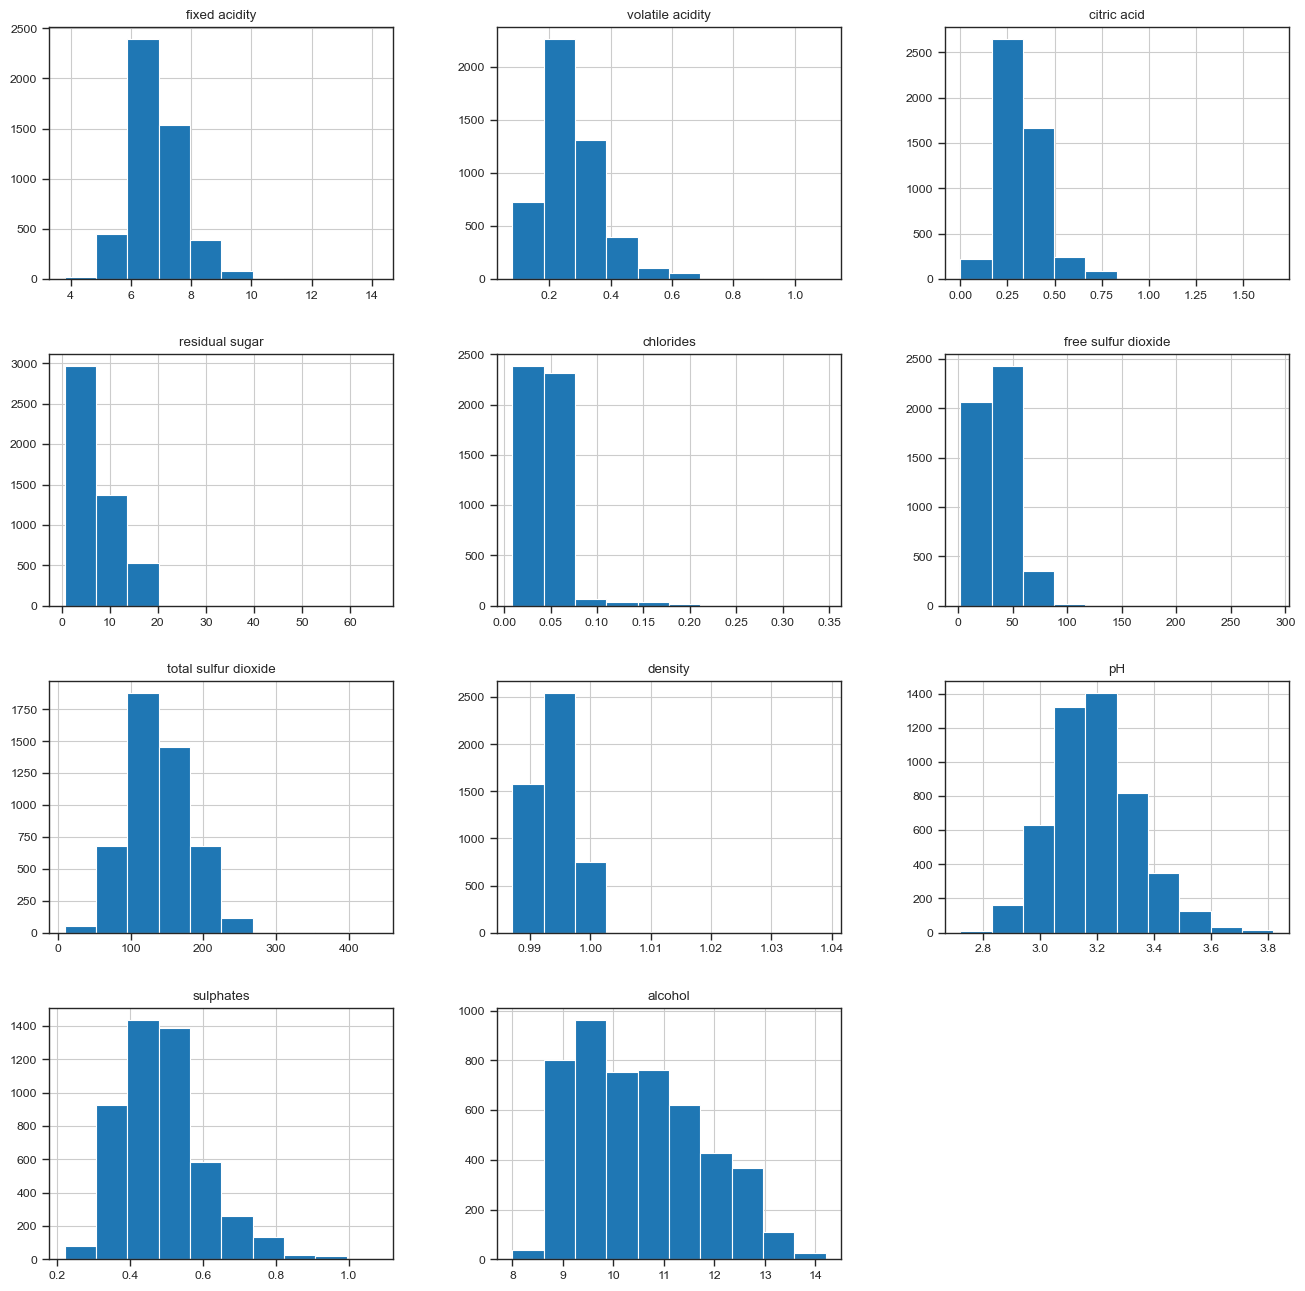

In [70]:
# Checando Outliers - aparentemente não tem (ignorando opinion, que é o target) - rever se sobrar tempo um método mais científico

df_white.drop('opinion', axis=1).hist(figsize=[16,16]);

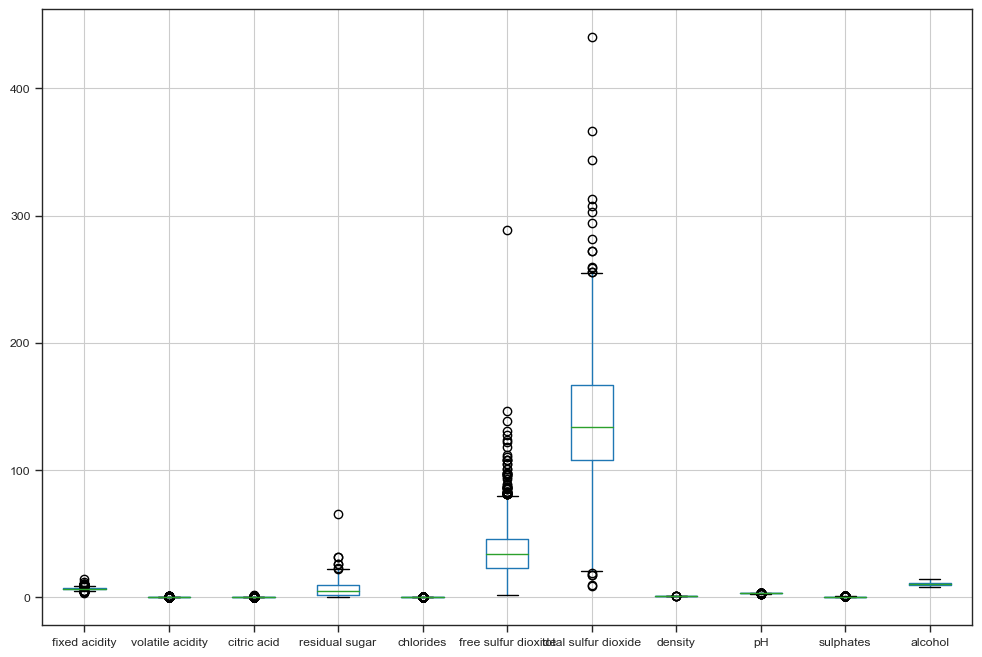

In [71]:
# Checando Outliers com Boxplot (mais preciso)
 
df_white.drop('opinion', axis=1).boxplot(figsize=[12,8]);

In [72]:
# Dropando free sulfer dioxide >200 - Possível Outlier mais claro


outlier = df_white[df_white['free sulfur dioxide'] > 200 ].index

df_white = df_white.drop(index = outlier)

In [73]:
# Iniciando regressão logística

vars = [
   'fixed acidity',
   'volatile acidity',
   'citric acid',
   'residual sugar',
   'chlorides',
   'free sulfur dioxide',
   'total sulfur dioxide',
   'density',
   'pH',
   'sulphates',
   'alcohol'
]

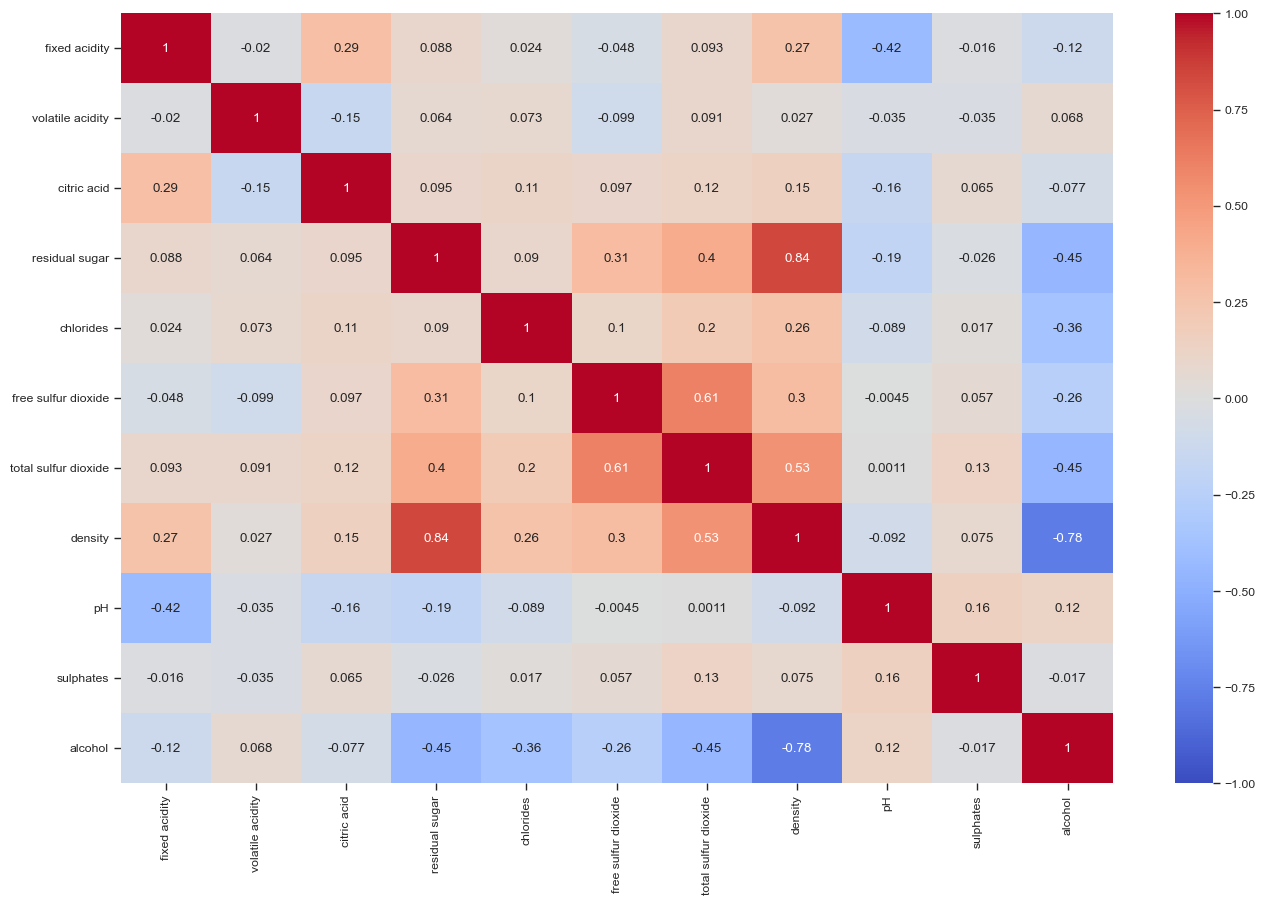

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
sns.heatmap(df_white[vars].corr(), vmax=1, vmin=-1, annot=True, ax=ax, cmap="coolwarm");

In [75]:
X_train, X_test, y_train, y_test = train_test_split(df_white[vars],
                                                    df_white['opinion'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df_white['opinion'])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [106]:
logreg = LogisticRegression(max_iter=10000)



logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000)

In [77]:
y_hat = logreg.predict_proba(X_train_scaled)
print(y_hat.shape)

(3895, 2)


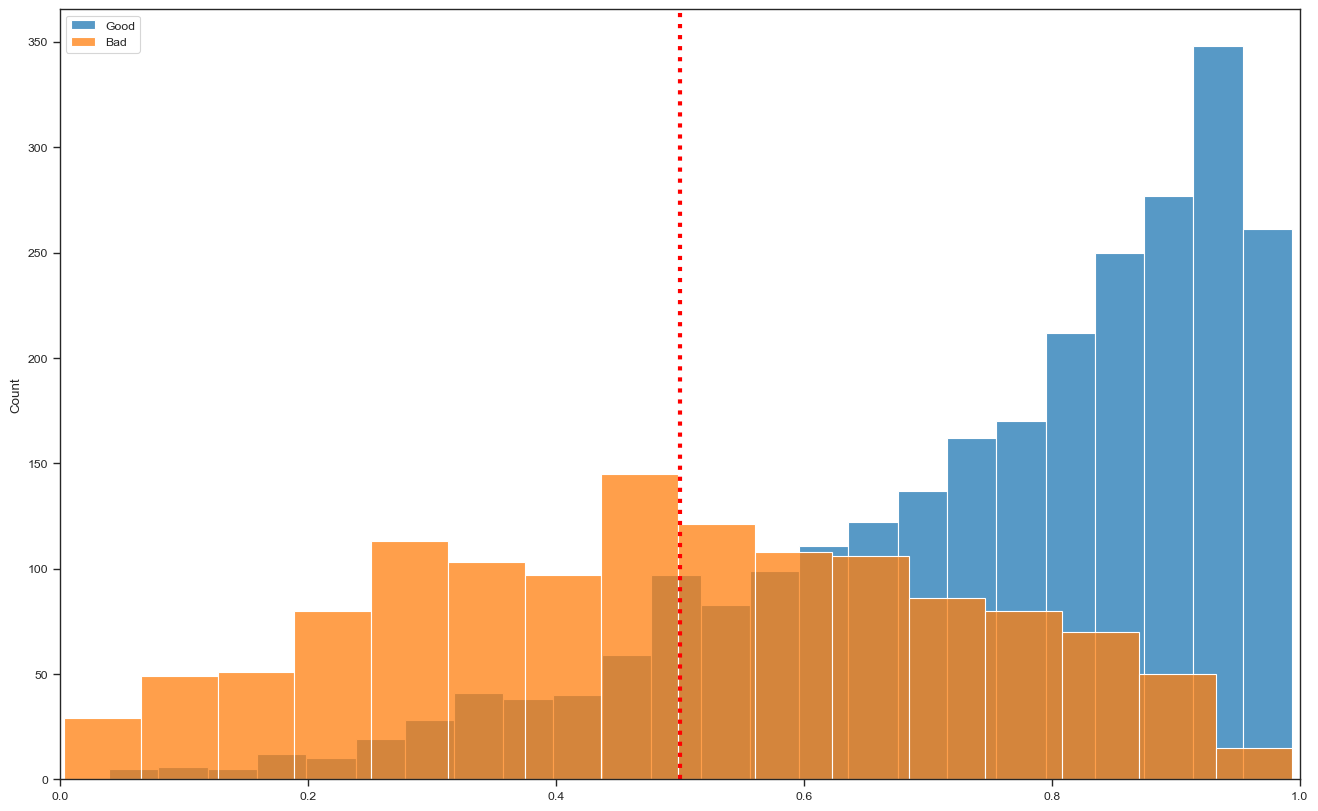

In [78]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
sns.histplot(y_hat[y_train.values == 1, 1], label="Good", ax=ax)
ax.set_xlim([0, 1])
sns.histplot(y_hat[y_train == 0, 1], label="Bad", ax=ax)
ax.legend();
ax.axvline(0.5, color="red", ls=":", lw=3);

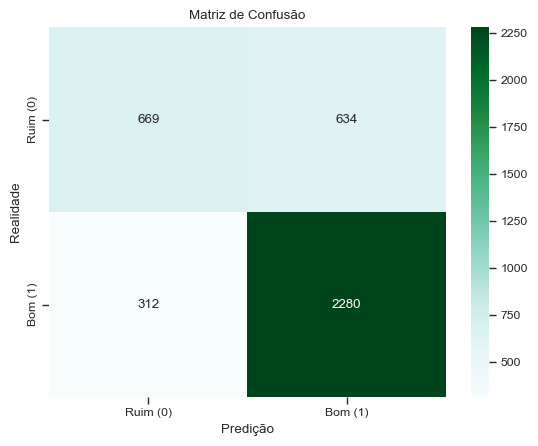

In [79]:
y_pred = logreg.predict(X_train_scaled)

cm = confusion_matrix(y_train, y_pred)

#cm = np.array([[434, 161], [1168, 516]])

ax = sns.heatmap(cm, cmap="BuGn", annot=True, fmt='g')
ax.set_xlabel("Predição")
ax.set_ylabel("Realidade")
ax.set_title("Matriz de Confusão")

ax.set_xticklabels(["Ruim (0)", "Bom (1)"]);
ax.set_yticklabels(["Ruim (0)", "Bom (1)"]);

In [80]:
y_pred

array([1, 1, 0, ..., 1, 0, 1])

In [81]:
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])

print(f"A precisão é {100*  precision:.2f} %")

accuracy = (cm[0, 0] + cm[1, 1]) / np.sum(cm)

print(f"A acurácia é {100 * accuracy:.2f} %")

# Sensibilidade ou taxa de verdadeiro positivo
sensibility = (cm[1, 1] / (cm[1, 1] + cm[1, 0]))
print(f"A sensibilidade é {100 *  sensibility:.2f} %")

specificity = (cm[0,0] / (cm[0, 0] + cm[0 ,1])) 

print(f"A especificidade é {100 * specificity:.2f} %")

# (1 - specificity) ou taxa de falsos positivos 

F1_score = 2 *(sensibility * precision) / (sensibility + precision)

print(f"F1 Score =  {F1_score:.2f}")

A precisão é 78.24 %
A acurácia é 75.71 %
A sensibilidade é 87.96 %
A especificidade é 51.34 %
F1 Score =  0.83


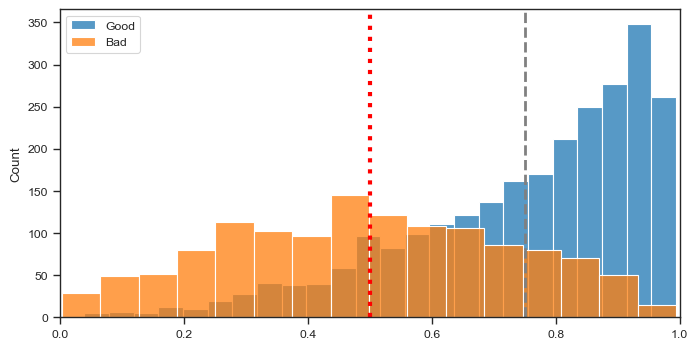

In [82]:
def plot_distributions(model, X, y, ax=None):
    y_hat = model.predict_proba(X)
    if ax == None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    sns.histplot(y_hat[y.values == 1, 1], label="Good", ax=ax)
    ax.set_xlim([0, 1])
    sns.histplot(y_hat[y == 0, 1], label="Bad", ax=ax)
    ax.legend();
    return ax

ax = plot_distributions(logreg, X_train_scaled, y_train)


ax.axvline(0.5, lw=3, color='red', ls=":");
ax.axvline(0.75, lw=2, color='gray', ls="--");

In [83]:
print(f"A acurácia é {100 * accuracy_score(y_train, y_pred):.2f} %")
print(f"A sensibilidade é {100 *  recall_score(y_train, y_pred):.2f} %")
print(f"A precisão é {100*  precision_score(y_train, y_pred):.2f} %")

A acurácia é 75.71 %
A sensibilidade é 87.96 %
A precisão é 78.24 %


In [84]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.51      0.59      1303
           1       0.78      0.88      0.83      2592

    accuracy                           0.76      3895
   macro avg       0.73      0.70      0.71      3895
weighted avg       0.75      0.76      0.75      3895



In [85]:
thresholds = np.linspace(0, 1, 101)
y_hat = logreg.predict_proba(X_train)


for threshold in thresholds:
    predictions = []
    if (y_hat > threshold).any():
        y_pred = 1.
    else:
        y_pred = 0.
    predictions.append(y_pred)

C:\Users\Fabio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [86]:
y_hat = logreg.predict_proba(X_train_scaled)
thresholds = np.linspace(0, 1, 101)

def specificity_score(y, y_pred):
    cm = confusion_matrix(y, y_pred)
    specificity = (cm[0,0] / (cm[0, 0] + cm[0 ,1])) 
    return specificity

def predict(model, X, threshold, pos_label=1):
    y_hat = model.predict_proba(X)
    y_pred = []
    for prob_tuple in y_hat:
        prob = prob_tuple[pos_label]
        if (prob > threshold).any():
            y_pred.append(1.)
        else:
            y_pred.append(0.)
    return np.array(y_pred)

#def predict(model, X, threshold, pos_label=1):
#    y_hat = model.predict_proba(X)
#    y_pred = (y_hat[:, pos_label] > threshold)
#    return y_pred.astype(float)
# Probabilidade de ter um vinho bom

recall = []
precision = []
specificity = []
f1 = []
for threshold in thresholds:
    y_pred_thr = predict(logreg, X_train_scaled, threshold)
    recall.append(recall_score(y_train, y_pred_thr))
    precision.append(precision_score(y_train, y_pred_thr))
    specificity.append(specificity_score(y_train, y_pred_thr))
    f1.append(f1_score(y_train, y_pred_thr))

C:\Users\Fabio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


f1 máximo: 0.83 - ponto de operação: 0.49
Recall: 0.89 - Precision: 0.78


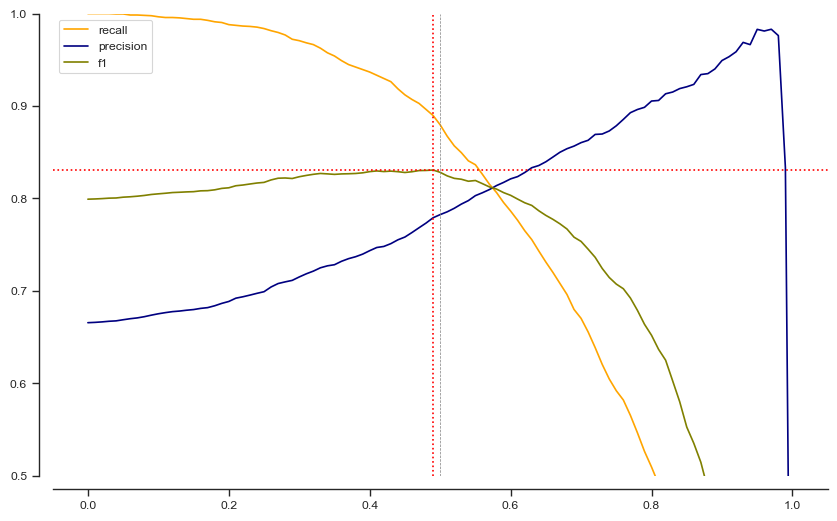

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.plot(thresholds, recall, color="orange", label="recall")
ax.plot(thresholds, precision, color="navy", label="precision")
ax.plot(thresholds, f1, color="olive", label="f1")

f1_max = max(f1)
thr_arg_max = np.argmax(f1)
thr_max = thresholds[thr_arg_max]

ax.axvline(thr_max, color="red", ls=":")
ax.axvline(0.5, color="gray",lw=0.5, ls="--")
ax.axhline(f1_max, color="red", ls=":")

ax.legend()
ax.set_ylim([0.5, 1])
print(f"f1 máximo: {f1_max:.2f} - ponto de operação: {thr_max:.2f}")
print(f"Recall: {recall[thr_arg_max]:.2f} - Precision: {precision[thr_arg_max]:.2f}")
sns.despine(offset=10)

In [88]:
# True positive rate ou taxa de verdadeiro positivo
tpr = recall
# False positive rate ou taxa de falso positivos
fpr = [(1 - s) for s in specificity]

(0.0, 1.0)

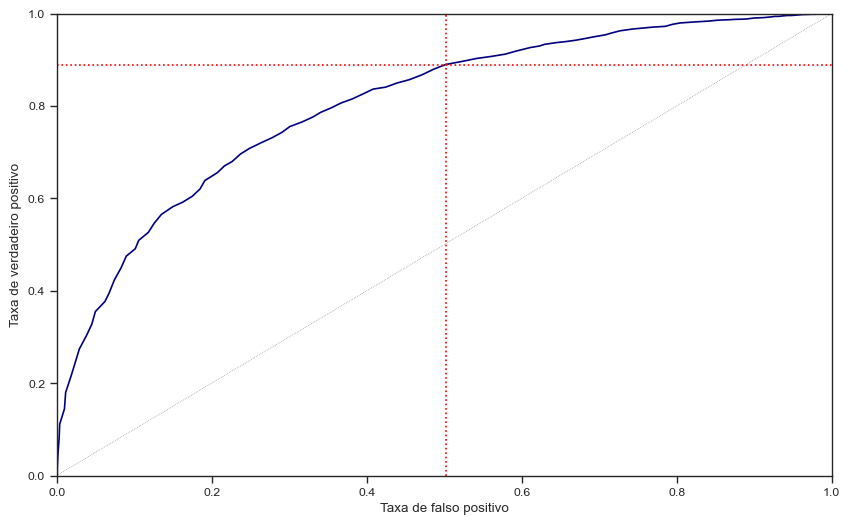

In [89]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.plot(fpr, tpr, color="navy")
ax.set_ylabel("Taxa de verdadeiro positivo")
ax.set_xlabel("Taxa de falso positivo")

ax.axvline(fpr[thr_arg_max], color="red", ls=":")
ax.axhline(tpr[thr_arg_max], color="red", ls=":")
ax.plot(thresholds, thresholds, color= "gray", ls=":", lw=0.5)
ax.set_ylim([0., 1.])
ax.set_xlim([0., 1.])

In [90]:
auc_score = auc(fpr, tpr)
print(f"Area Under Curve (AUC): {auc_score:.2f}")

Area Under Curve (AUC): 0.80


In [91]:
def get_f1_score_list(model, X, y, thresholds):
    list_of_f1 = []
    for threshold in thresholds:
        y_pred = predict(model, X, threshold)
        f1 = f1_score(y, y_pred)
        list_of_f1.append(f1)
    return list_of_f1

def get_max_f1_score(model, X, y, thresholds):
    list_of_f1 = get_f1_score_list(model, X, y, thresholds)
    f1_max = max(list_of_f1)
    f1_arg_max = np.argmax(list_of_f1)
    threshold_max = thresholds[f1_arg_max]
    return f1_max, threshold_max, f1_arg_max


fpr, tpr, thresholds = roc_curve(y_train, y_hat[:, 1], pos_label=1)
auc_score = auc(fpr, tpr)
f1_max, threshold_max, f1_arg_max =  get_max_f1_score(logreg,
                                                      X_train_scaled,
                                                      y_train,
                                                      thresholds)


print(f"Area Under Curve (AUC): {auc_score:.2f}")
print(f"Maximum F1 : {f1_max:.2f} at {threshold_max:.3f}")

Area Under Curve (AUC): 0.80
Maximum F1 : 0.83 at 0.488


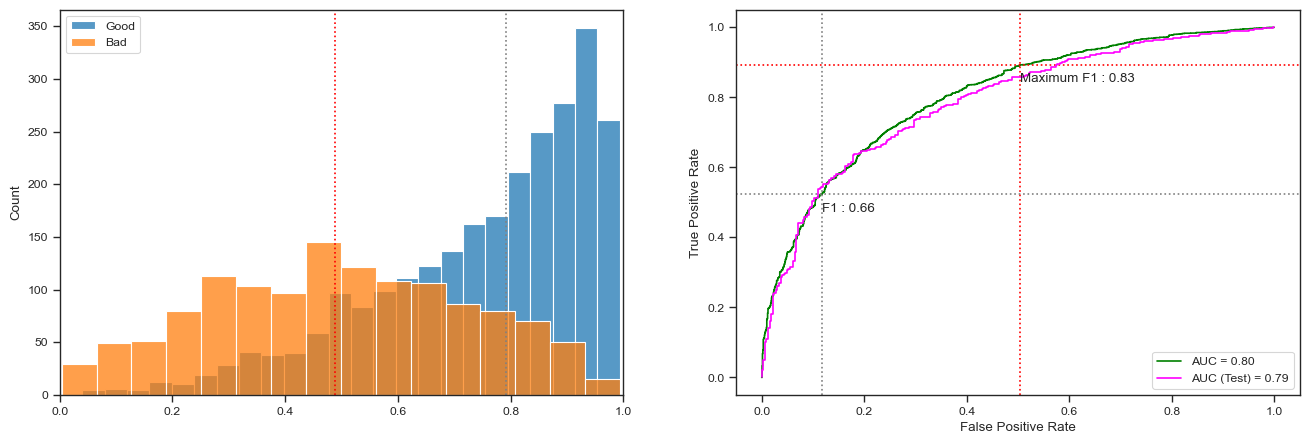

In [92]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

threshold_random = 500

# DISTRIBUTION
plot_distributions(logreg, X_train_scaled, y_train, ax=axes[0])
axes[0].axvline(threshold_max, color="red", ls=":")
axes[0].axvline(thresholds[threshold_random], color="gray", ls=":")

# ROC CURVE
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_score).plot(ax=axes[1],color="green")
axes[1].axvline(fpr[f1_arg_max], color="red", ls=":")
axes[1].axhline(tpr[f1_arg_max], color="red", ls=":")
axes[1].annotate(f"Maximum F1 : {f1_max:.2f}", (fpr[f1_arg_max], tpr[f1_arg_max] - 0.05))


f1_list = get_f1_score_list(logreg, X_train_scaled, y_train, thresholds)


axes[1].axvline(fpr[threshold_random], color="gray", ls=":")
axes[1].axhline(tpr[threshold_random], color="gray", ls=":")

axes[1].annotate(f"F1 : {f1_list[threshold_random]:.2f}",
                        (fpr[threshold_random],
                         tpr[threshold_random] - 0.05))


# ROC CURVE Test
y_hat_test = logreg.predict_proba(X_test_scaled)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_hat_test[:, 1], pos_label=1)
auc_score_test = auc(fpr_test, tpr_test)

RocCurveDisplay(fpr=fpr_test, tpr=tpr_test, roc_auc=auc_score_test).plot(ax=axes[1],
                                                                         label=f"AUC (Test) = {auc_score_test:.2}",
                                                                         color="magenta")

Treine um modelo de árvores de decisão usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:
i. a média e desvio da acurácia dos modelos obtidos;
ii. a média e desvio da precisão dos modelos obtidos;
iii. a média e desvio da recall dos modelos obtidos;
iv. a média e desvio do f1-score dos modelos obtidos.

# Treinamento com validação cruzada

![](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [93]:
# Import necessary packages
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import deepcopy as cp
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.tree import (
    DecisionTreeClassifier, 
    plot_tree
)

from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold)
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    RocCurveDisplay
)

sns.set_style("ticks")
sns.set_context("paper")

random_state = 42

X = df_white[vars]
y = df_white['opinion']

X_train_cv, X_test, y_train_cv, y_test = train_test_split(X.values,
                                                          y.values,
                                                          test_size=0.2, # 20 % da base
                                                          random_state=42,
                                                          stratify=y)

def train(X, y, model_klass, model_kwargs = {}):
    cv = StratifiedKFold(n_splits=10) # Esse n_splits é o K, do K folds, que no exercício é pedido 10
    f1_score_val_list = []
    f1_score_train_list = []
    model_list =[]
    scaler_list = []
    # Validação cruzada só em Training Data
    for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
        X_train = X[train_idx, :]
        y_train = y[train_idx]
        X_val = X[val_idx, :]
        y_val = y[val_idx]

        # Escala
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)

        scaler_list.append(scaler)

        # Treino
        model = model_klass(**model_kwargs)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_train_scaled)

        y_pred_val = model.predict(X_val_scaled)
        print(f"========================= FOLD {fold} ==========================")
        print(f"Meu resultado para treino de F1-Score é {f1_score(y_train, y_pred):.2}")
        print(f"Meu resultado para validação de F1-Score é {f1_score(y_val, y_pred_val):.2}") 
        f1_score_val_list.append(f1_score(y_val, y_pred_val))
        f1_score_train_list.append(f1_score(y_train, y_pred))
        model_list.append(model)
    print()
    print()
    mean_val = np.mean(f1_score_val_list)
    std_val = np.std(f1_score_val_list)
    print(f"Meu resultado de F1-Score Médio de treino é {np.mean(f1_score_train_list): .2} (média) +- {np.std(f1_score_train_list): .2} (desvio padrão)")
    print(f"Meu resultado de F1-Score Médio de validação é {mean_val: .2} (média) +- {std_val: .2} (desvio padrão)")
    print()

    best_model_idx = np.argmax(f1_score_val_list)
    print(f"Meu melhor fold é: {best_model_idx} ")
    best_model = model_list[best_model_idx]

    # Fazer a inferência em Test Data
    best_scaler = scaler_list[best_model_idx]
    X_test_scaled = best_scaler.transform(X_test)
    y_pred_test = model.predict(X_test_scaled)

    print()
    print()
    print(f"Meu resultado de F1-Score para o conjunto de teste é: {f1_score(y_test, y_pred_test):.2} ")
    print(f"Melhor modelo, média, desvio padrão: {best_model, mean_val, std_val}")
    return best_model, mean_val, std_val

In [94]:
train(X_train_cv, y_train_cv, LogisticRegression)

========================= FOLD 0 ==========================
Meu resultado para treino de F1-Score é 0.83
Meu resultado para validação de F1-Score é 0.84
========================= FOLD 1 ==========================
Meu resultado para treino de F1-Score é 0.83
Meu resultado para validação de F1-Score é 0.83
========================= FOLD 2 ==========================
Meu resultado para treino de F1-Score é 0.82
Meu resultado para validação de F1-Score é 0.83
========================= FOLD 3 ==========================
Meu resultado para treino de F1-Score é 0.83
Meu resultado para validação de F1-Score é 0.81
========================= FOLD 4 ==========================
Meu resultado para treino de F1-Score é 0.83
Meu resultado para validação de F1-Score é 0.78
========================= FOLD 5 ==========================
Meu resultado para treino de F1-Score é 0.83
Meu resultado para validação de F1-Score é 0.82
========================= FOLD 6 ==========================
Meu resultado para tre

(LogisticRegression(), 0.8266772811724753, 0.02018560836839188)

========================= FOLD 0 ==========================
Meu resultado para treino de F1-Score é 1.0
Meu resultado para validação de F1-Score é 0.8
========================= FOLD 1 ==========================
Meu resultado para treino de F1-Score é 1.0
Meu resultado para validação de F1-Score é 0.83
========================= FOLD 2 ==========================
Meu resultado para treino de F1-Score é 1.0
Meu resultado para validação de F1-Score é 0.85
========================= FOLD 3 ==========================
Meu resultado para treino de F1-Score é 1.0
Meu resultado para validação de F1-Score é 0.82
========================= FOLD 4 ==========================
Meu resultado para treino de F1-Score é 1.0
Meu resultado para validação de F1-Score é 0.84
========================= FOLD 5 ==========================
Meu resultado para treino de F1-Score é 1.0
Meu resultado para validação de F1-Score é 0.82
========================= FOLD 6 ==========================
Meu resultado para treino de 

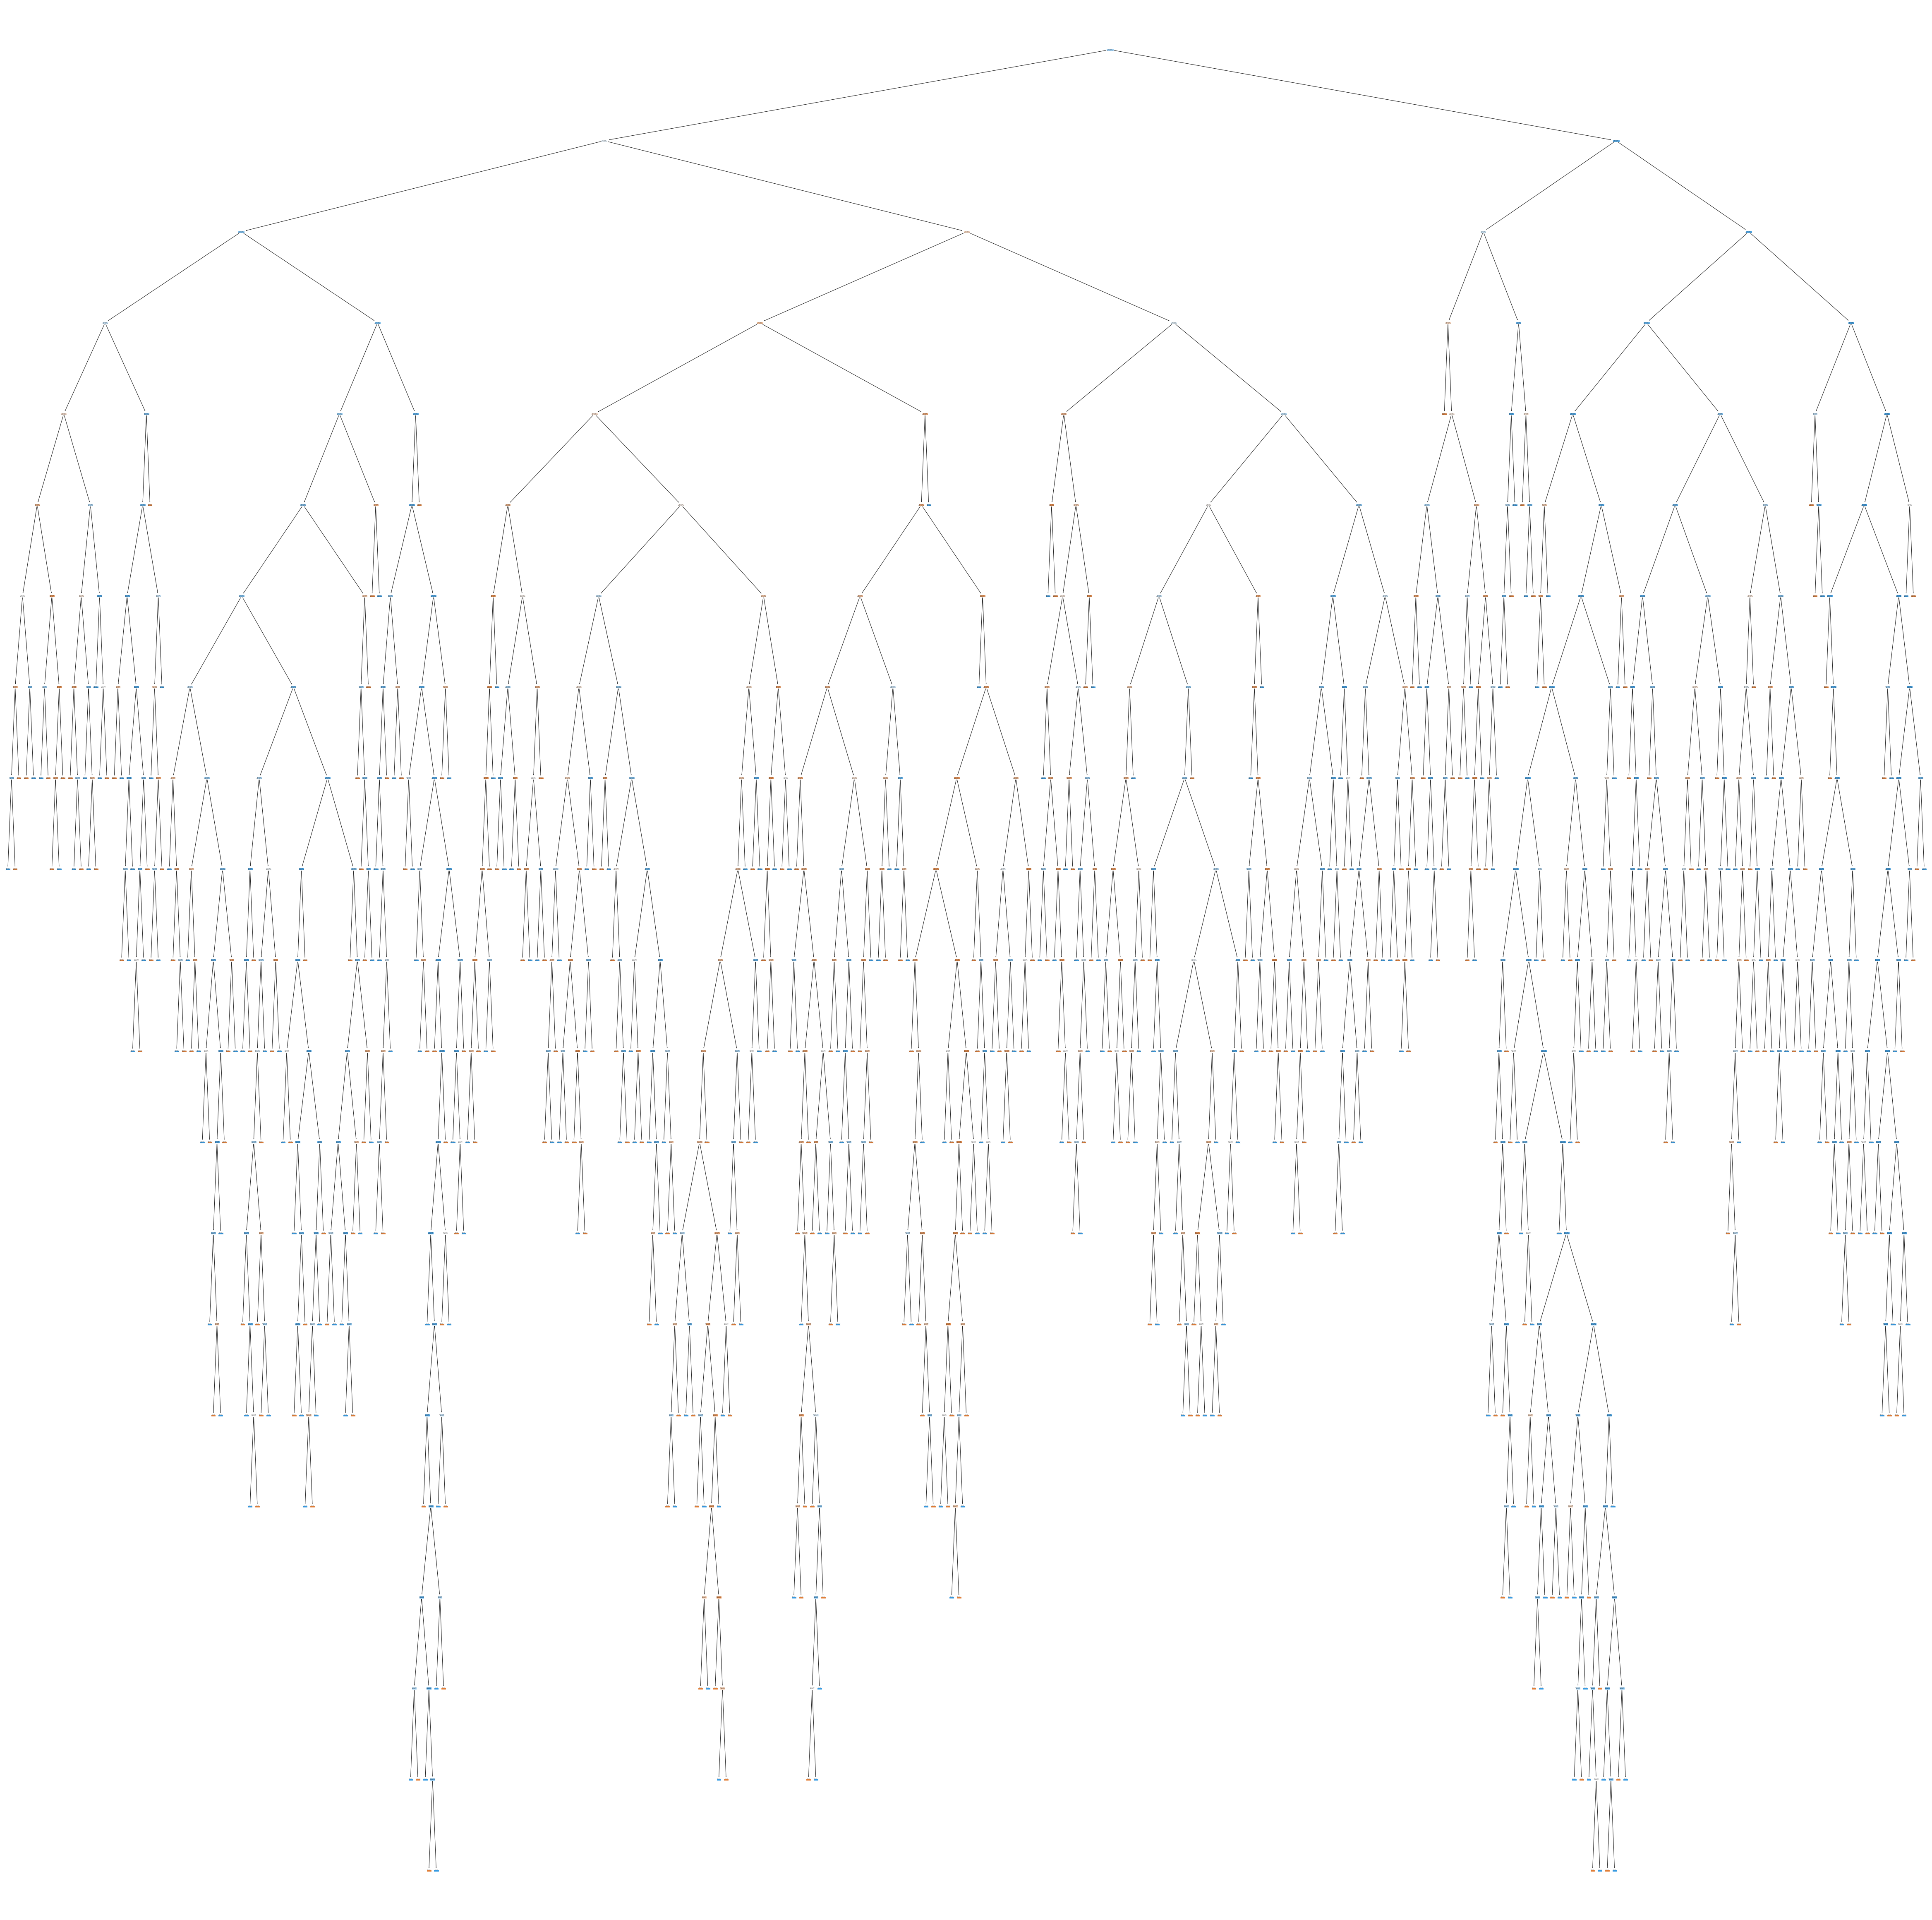

In [95]:
# Fazendo árvore de decisão

tree_model, _, _  = train(X_train_cv, y_train_cv, DecisionTreeClassifier)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(60, 60))
plot_tree(tree_model, filled=True);

Treine um modelo de SVM usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:
i. a média e desvio da acurácia dos modelos obtidos;
ii. a média e desvio da precisão dos modelos obtidos;
iii. a média e desvio da recall dos modelos obtidos;
iv. a média e desvio do f1-score dos modelos obtidos.

In [96]:
# Iniciando SVM

from sklearn.svm import SVC
tree_model, _, _ = train(X_train_cv, y_train_cv, SVC, model_kwargs={'gamma': 'auto', 'C': 1, 'kernel': 'rbf'})

========================= FOLD 0 ==========================
Meu resultado para treino de F1-Score é 0.87
Meu resultado para validação de F1-Score é 0.86
========================= FOLD 1 ==========================
Meu resultado para treino de F1-Score é 0.87
Meu resultado para validação de F1-Score é 0.85
========================= FOLD 2 ==========================
Meu resultado para treino de F1-Score é 0.87
Meu resultado para validação de F1-Score é 0.85
========================= FOLD 3 ==========================
Meu resultado para treino de F1-Score é 0.87
Meu resultado para validação de F1-Score é 0.83
========================= FOLD 4 ==========================
Meu resultado para treino de F1-Score é 0.87
Meu resultado para validação de F1-Score é 0.82
========================= FOLD 5 ==========================
Meu resultado para treino de F1-Score é 0.87
Meu resultado para validação de F1-Score é 0.85
========================= FOLD 6 ==========================
Meu resultado para tre

In [97]:
degrees = [3, 5, 10] 

results = []
for degree in degrees:
    tree_model_poly, mean_val, std_val = train(X_train_cv, y_train_cv, SVC, model_kwargs={'gamma': 'auto',
                                                                                          'C': 1,
                                                                                          'degree': degree,
                                                                                          'kernel': 'poly'})
    results.append(mean_val)

========================= FOLD 0 ==========================
Meu resultado para treino de F1-Score é 0.85
Meu resultado para validação de F1-Score é 0.84
========================= FOLD 1 ==========================
Meu resultado para treino de F1-Score é 0.85
Meu resultado para validação de F1-Score é 0.85
========================= FOLD 2 ==========================
Meu resultado para treino de F1-Score é 0.85
Meu resultado para validação de F1-Score é 0.84
========================= FOLD 3 ==========================
Meu resultado para treino de F1-Score é 0.85
Meu resultado para validação de F1-Score é 0.81
========================= FOLD 4 ==========================
Meu resultado para treino de F1-Score é 0.85
Meu resultado para validação de F1-Score é 0.82
========================= FOLD 5 ==========================
Meu resultado para treino de F1-Score é 0.85
Meu resultado para validação de F1-Score é 0.84
========================= FOLD 6 ==========================
Meu resultado para tre

In [98]:
results

[0.8347168829858767, 0.8299796958987715, 0.8236547569695176]

In [99]:
config = [
    (SVC, {'kernel': 'rbf'}),
    (SVC, {'kernel': 'rbf', 'gamma': 2}),
    (SVC, {'degree': 3, 'kernel': 'poly'} ),
    (SVC, {'degree': 5, 'kernel': 'poly'} ),
    (SVC, {'degree': 10, 'kernel': 'poly'} ),
    (LogisticRegression, {}),
    (DecisionTreeClassifier, {'min_samples_leaf': 50}),
]

results = []
for model_class, setting in config:
    print(model_class.__name__)
    best_model, mean_val, std_val = train(X_train_cv, y_train_cv, model_class, setting)
    results.append(mean_val)

SVC
========================= FOLD 0 ==========================
Meu resultado para treino de F1-Score é 0.87
Meu resultado para validação de F1-Score é 0.86
========================= FOLD 1 ==========================
Meu resultado para treino de F1-Score é 0.87
Meu resultado para validação de F1-Score é 0.85
========================= FOLD 2 ==========================
Meu resultado para treino de F1-Score é 0.87
Meu resultado para validação de F1-Score é 0.85
========================= FOLD 3 ==========================
Meu resultado para treino de F1-Score é 0.87
Meu resultado para validação de F1-Score é 0.83
========================= FOLD 4 ==========================
Meu resultado para treino de F1-Score é 0.87
Meu resultado para validação de F1-Score é 0.82
========================= FOLD 5 ==========================
Meu resultado para treino de F1-Score é 0.87
Meu resultado para validação de F1-Score é 0.85
========================= FOLD 6 ==========================
Meu resultado para

In [100]:
results

[0.8464253136276347,
 0.8528004671530853,
 0.8347168829858767,
 0.8299796958987715,
 0.8236547569695176,
 0.8266772811724753,
 0.8180328314730566]

Em relação à questão anterior, qual o modelo deveria ser escolhido para uma eventual operação. Responda essa questão mostrando a comparação de todos os modelos, usando um gráfico mostrando a curva ROC média para cada um dos gráficos e justifique.



In [104]:
# 0,83 - melhor resultado foi o SVM. Mas fazendo a curva ROC:

# Create a list to store the models and their performance
models = []

# Define the models you want to compare
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = SVC()

# Train and evaluate each model
for model in [model1, model2, model3]:
    model.fit(X_train_scaled, y_train)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    models.append((model, fpr, tpr, roc_auc))

# Plot the average ROC curve for each model
plt.figure(figsize=(10, 8))
for model, fpr, tpr, roc_auc in models:
    plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Average ROC Curve')
plt.legend(loc='lower right')
plt.show()


AttributeError: predict_proba is not available when  probability=False

Com a escolha do melhor modelo, use os dados de vinho tinto, presentes na base original e faça a inferência (não é para treinar novamente!!!) para saber quantos vinhos são bons ou ruins. Utilize o mesmo critério utilizado com os vinhos brancos, para comparar o desempenho do modelo. Ele funciona da mesma forma para essa nova base? Justifique.

Disponibilize os códigos usados para responder da questão 2 a 6 em uma conta github e indique o link para o repositório.

https://github.com/FabioRochaPoeta/wine-case/blob/main/analisando-db-vinho-branco.ipynb

Assim que terminar, salve o seu arquivo PDF e poste no Moodle. Utilize o seu nome para nomear o arquivo, identificando também a disciplina no seguinte formato: “nomedoaluno_nomedadisciplina_pd.PDF”.

OK

In [103]:
# Separate red wines and drop the quality column
color = 'red'
df_red = wine.drop('quality', axis=1).query('type == @color').copy()

# Create the opinion column
df_red['opinion'] = (df_red['quality'] > 5).astype(int)

# Split the data into train and test sets
X_red = df_red[vars]
y_red = df_red['opinion']
X_red_scaled = scaler.transform(X_red)
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red_scaled, y_red, test_size=0.2, random_state=42, stratify=y_red)

# Use the best model chosen from the previous comparison
best_model = model2  # Assuming DecisionTreeClassifier was the best model

# Train the best model on the white wine data
best_model.fit(X_train_scaled, y_train)

# Apply the best model on the red wine data
y_pred_red = best_model.predict(X_test_red)

# Evaluate the performance of the best model on the red wine data
accuracy_red = accuracy_score(y_test_red, y_pred_red)
precision_red = precision_score(y_test_red, y_pred_red)
recall_red = recall_score(y_test_red, y_pred_red)
f1_score_red = f1_score(y_test_red, y_pred_red)

# Compare the performance with the white wine data
print("White Wine Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}\n")


KeyError: 'quality'